In [1]:
import pandas as pd

data = pd.read_csv('rad_features1.csv')

label_data = pd.read_csv(r'D:/20220421-FANBIN/label.csv')
class_mapping = {'I': 0, "IIA": 1, "IIB": 2, 'III':3, 'IV':4, 'V':5, 'VI':5}
label_data[['label']] = label_data[['label']].applymap(lambda x: class_mapping[x])
label_data[['ID']] = label_data[['ID']].applymap(lambda x: f"{x}.nii.gz")
print(label_data['label'].value_counts())

label_data.head()
label_data = label_data.dropna(axis=0)
data = pd.merge(data, label_data, on='ID', how='inner')
data.columns = [c.replace('-', '_') for c in data.columns]
data

0    53
5    32
1    23
3    11
4    11
2    10
Name: label, dtype: int64


ID  exponential_firstorder_10Percentile  \
0          17026055.nii.gz                             1.201357   
1        1707170974.nii.gz                             1.798579   
2        1707296697.nii.gz                             0.854276   
3        1708204504.nii.gz                             1.141922   
4        1709176921.nii.gz                             0.829481   
..                     ...                                  ...   
119       zhaolei-m.nii.gz                             1.221794   
120       zhaorui-m.nii.gz                             1.455344   
121   zhaoshuping-m.nii.gz                             0.916472   
122  zhouhcuanhai-m.nii.gz                             0.890511   
123  zhuzhaoliang-m.nii.gz                             0.801079   

     exponential_firstorder_90Percentile  exponential_firstorder_Energy  \
0                               2.903185                   9.395387e+08   
1                               5.659763                   5.075234e+08   
2                               3.081652                   5.149461e+08   
3                               1.763621                   3.730874e+08   
4                               1.832579                   5.658837e+08   
..                                   ...                            ...   
119                             2.595526                   1.756409e+08   
120                             2.942381                   3.715565e+07   
121                             1.588933                   1.404375e+08   
122                             2.295600                   3.661399e+08   
123                             1.541722                   1.834263e+08   

     exponential_firstorder_Entropy  \
0                      3.875978e-01   
1                      6.231158e-01   
2                      1.893170e-01   
3                      5.364499e-02   
4                      1.821616e-01   
..                              ...   
119                   -3.203427e-16   
120                   -3.203427e-16   
121                    1.080232e-01   
122                    1.856908e-01   
123                   -3.203427e-16   

     exponential_firstorder_InterquartileRange  \
0                                     0.671840   
1                                     1.784997   
2                                     0.852849   
3                                     0.226722   
4                                     0.380104   
..                                         ...   
119                                   0.654361   
120                                   0.830143   
121                                   0.361182   
122                                   0.606133   
123                                   0.379482   

     exponential_firstorder_Kurtosis  exponential_firstorder_Maximum  \
0                         122.104286                       64.023255   
1                          57.784339                       34.301035   
2                          89.532145                       29.427824   
3                         117.436653                       10.033452   
4                         142.277091                       51.277166   
..                               ...                             ...   
119                         3.990087                        3.744069   
120                         4.485463                        4.282266   
121                        64.984785                       25.023852   
122                        44.886624                       13.306170   
123                        16.714119                        3.905575   

     exponential_firstorder_Mean  \
0                       2.415562   
1                       3.485887   
2                       1.892335   
3                       1.460341   
4                       1.662064   
..                           ...   
119                     1.829344   
120                     2.100978   
121                     1.557034   
122                    

In [2]:
from onekey_algo.custom.components.stats import clinic_stats

stats = clinic_stats(data, stats_columns=list(data.columns[1:-1]), label_column='label', 
                     continuous_columns=list(data.columns[1:-1]))

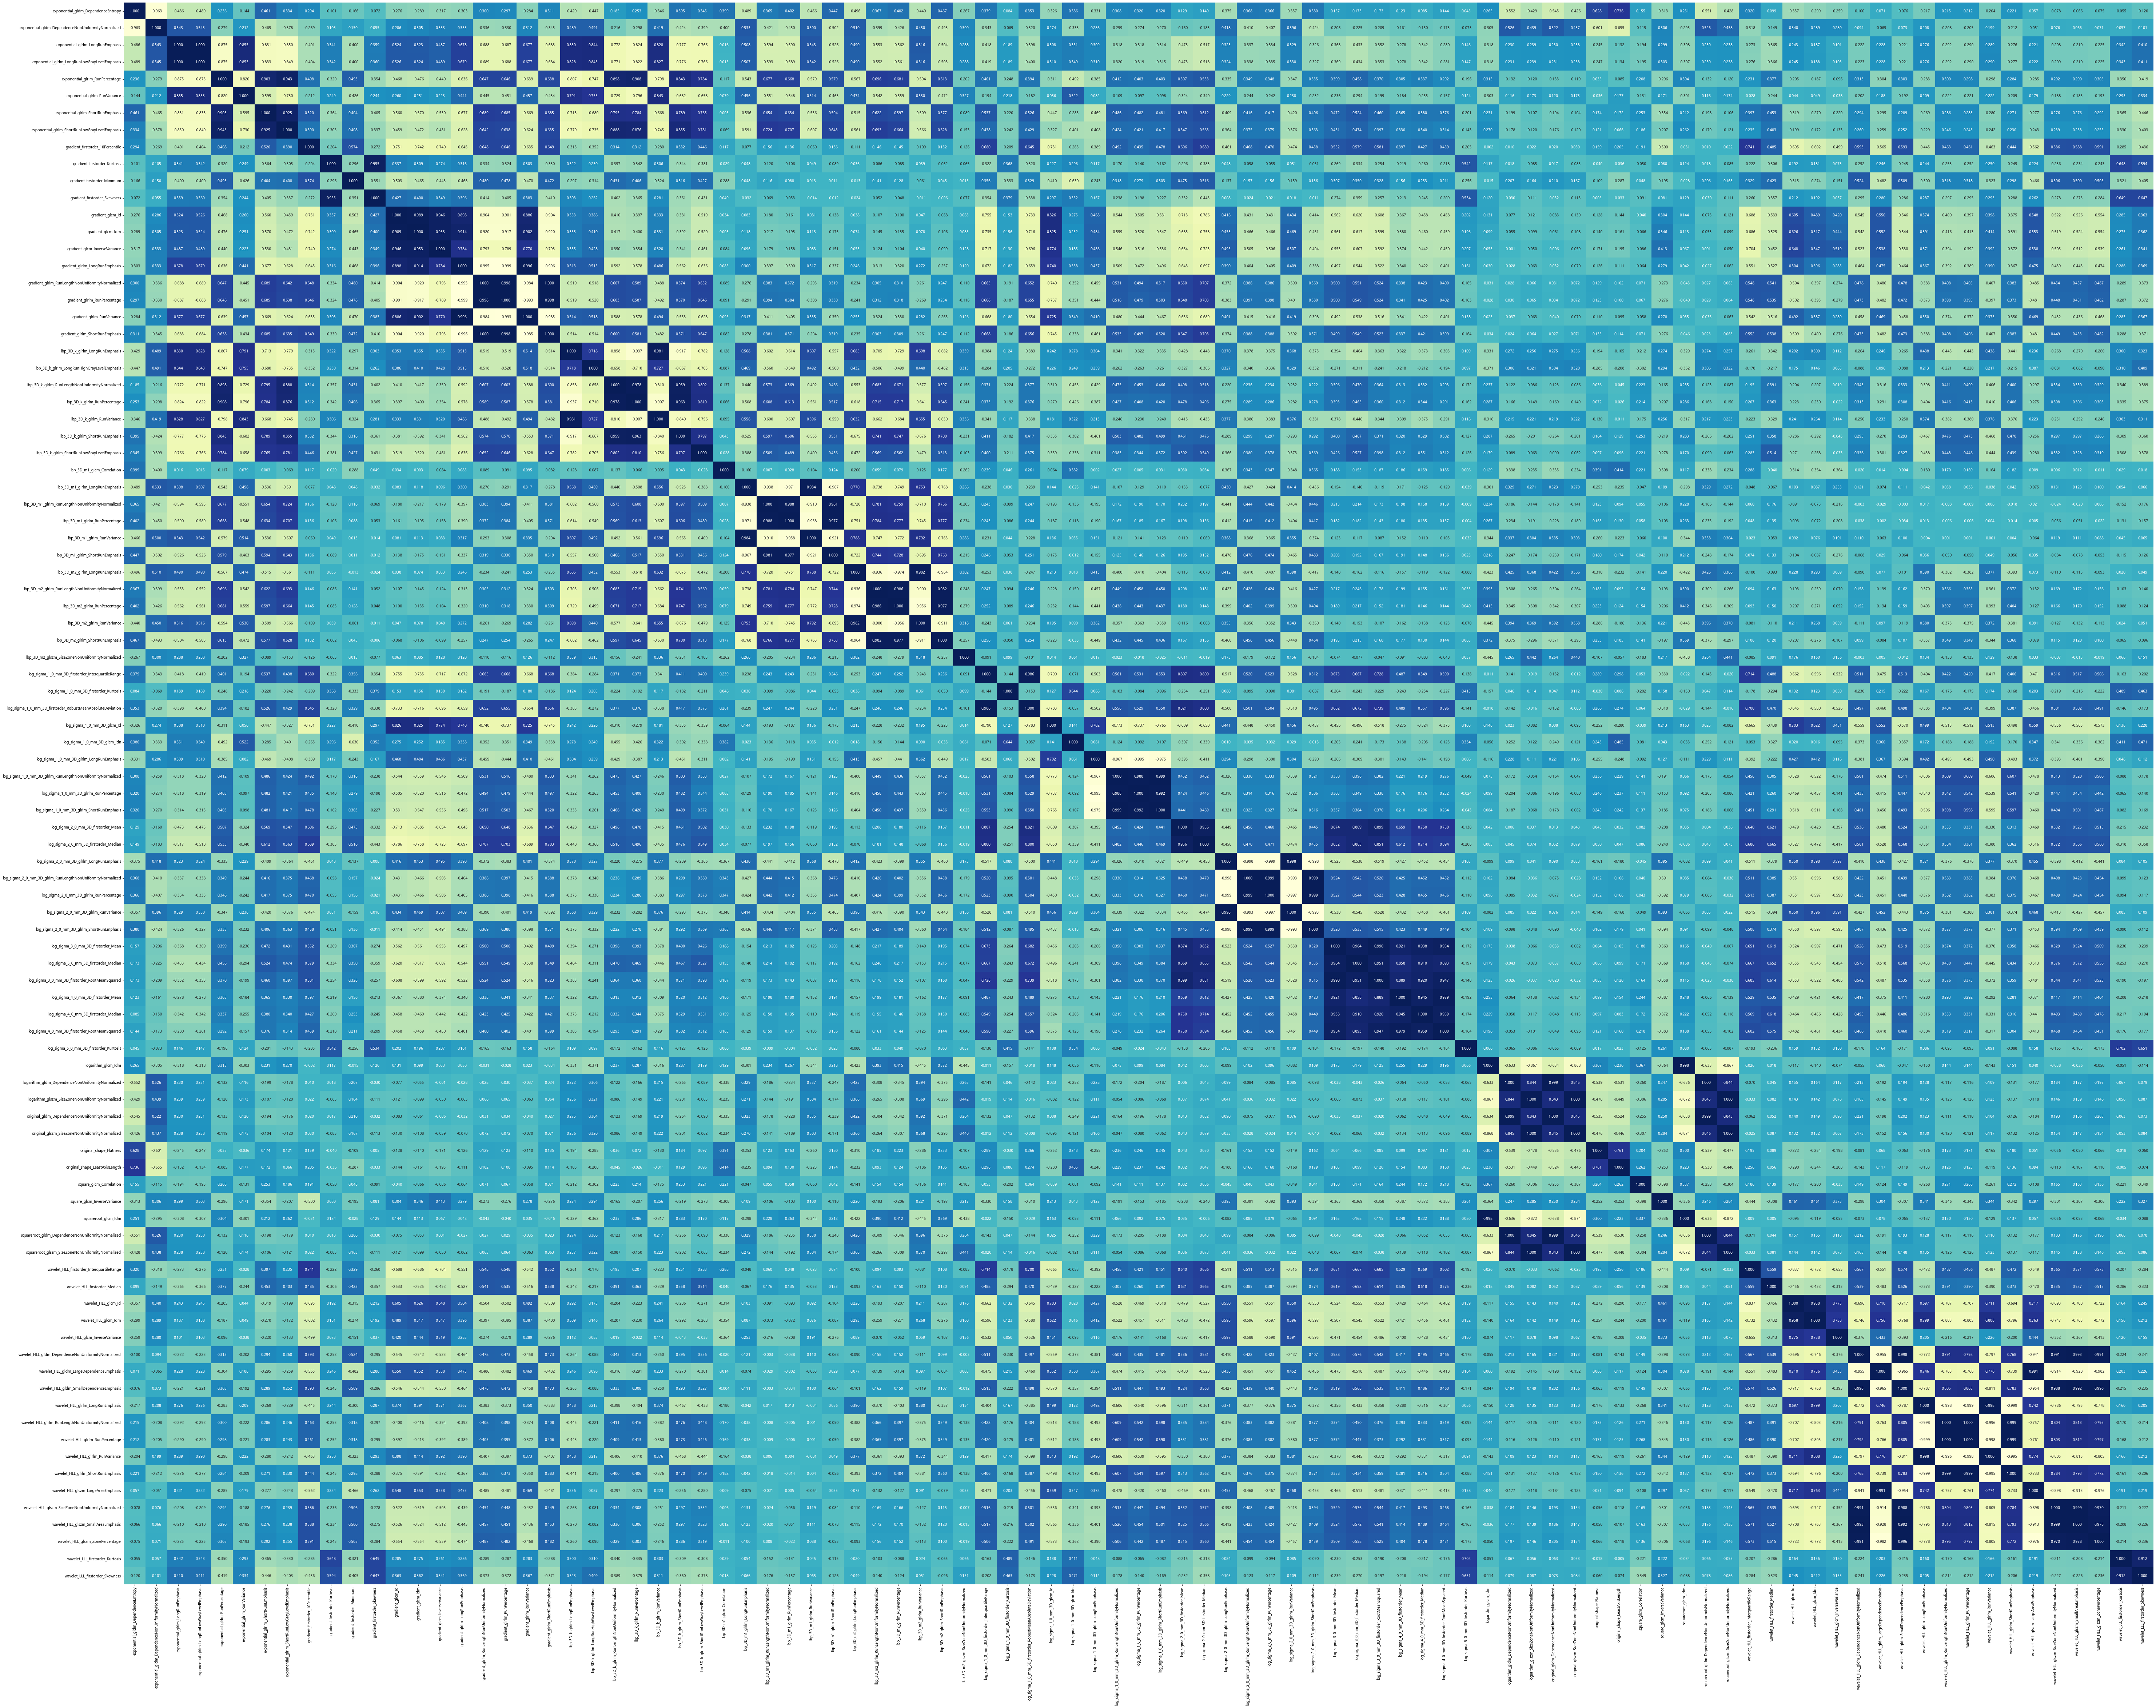

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from onekey_algo.custom.components.comp1 import draw_matrix
sel_data = data[stats['feature_name'][stats['pvalue'] < 0.01]]
plt.figure(figsize=(100.0, 80.0))

# 选择可视化的相关系数
draw_matrix(sel_data.corr('pearson'), annot=True, cmap='YlGnBu', cbar=False)
plt.savefig(f'img/sel_feature_corr.svg', bbox_inches = 'tight')

In [4]:
stats[['group']] = stats[['feature_name']].applymap(lambda x: x.split('_')[-2])

In [5]:
stats = stats[['feature_name', 'pvalue', 'group']]
sorted_counts = stats['group'].value_counts()
stats

feature_name    pvalue       group
0                  exponential_firstorder_10Percentile  0.379642  firstorder
1                  exponential_firstorder_90Percentile  0.160159  firstorder
2                        exponential_firstorder_Energy  0.795842  firstorder
3                       exponential_firstorder_Entropy  0.821454  firstorder
4            exponential_firstorder_InterquartileRange  0.044773  firstorder
...                                                ...       ...         ...
1901  wavelet_LLL_glszm_SmallAreaHighGrayLevelEmphasis  0.267800       glszm
1902   wavelet_LLL_glszm_SmallAreaLowGrayLevelEmphasis  0.323362       glszm
1903                     wavelet_LLL_glszm_ZoneEntropy  0.537069       glszm
1904                  wavelet_LLL_glszm_ZonePercentage  0.234886       glszm
1905                    wavelet_LLL_glszm_ZoneVariance  0.157151       glszm

[1906 rows x 3 columns]

In [6]:
pd.DataFrame(sorted_counts)

group
glcm          484
firstorder    396
glrlm         352
glszm         352
gldm          308
shape          14

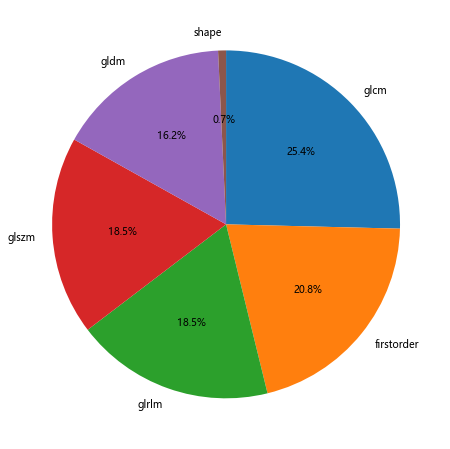

In [7]:
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct = '%.1f%%');
plt.savefig(f'img/feature_ratio.svg', bbox_inches = 'tight')

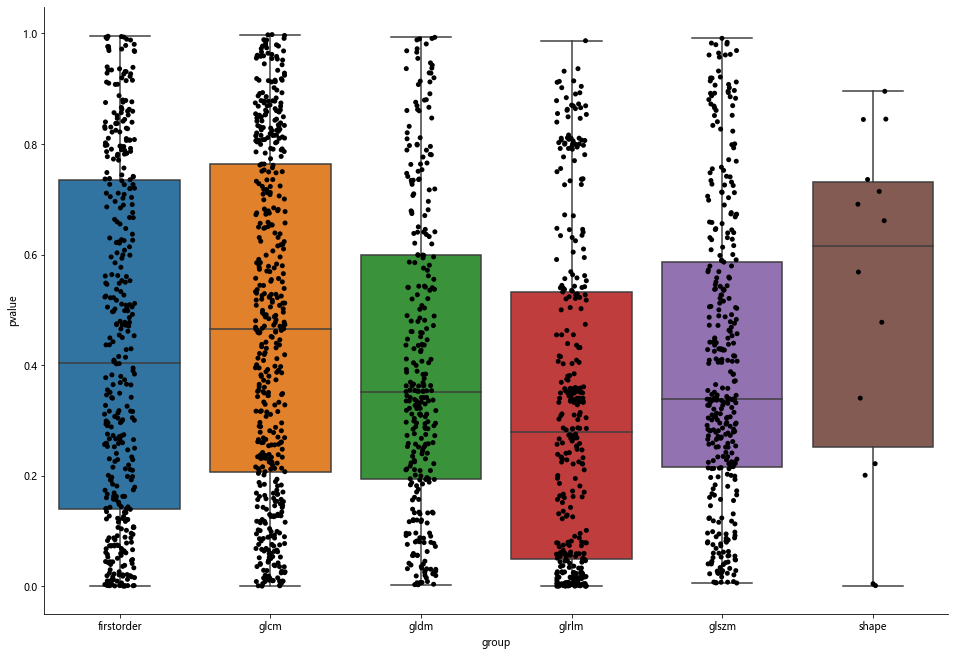

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.catplot(x="group", y="pvalue", data=stats, kind="box")
g.fig.set_size_inches(15,10)
sns.stripplot(x="group", y="pvalue", data=stats, ax=g.ax, color='black')
plt.savefig(f'img/feature_stats.svg', bbox_inches = 'tight')

In [9]:
stats[stats['group'] == 'shape']

feature_name    pvalue  group
1032               original_shape_Elongation  0.661230  shape
1033                 original_shape_Flatness  0.001243  shape
1034          original_shape_LeastAxisLength  0.004640  shape
1035          original_shape_MajorAxisLength  0.340311  shape
1036  original_shape_Maximum2DDiameterColumn  0.568372  shape
1037     original_shape_Maximum2DDiameterRow  0.221787  shape
1038   original_shape_Maximum2DDiameterSlice  0.895228  shape
1039        original_shape_Maximum3DDiameter  0.477547  shape
1040               original_shape_MeshVolume  0.714183  shape
1041          original_shape_MinorAxisLength  0.844289  shape
1042               original_shape_Sphericity  0.200861  shape
1043              original_shape_SurfaceArea  0.844990  shape
1044       original_shape_SurfaceVolumeRatio  0.690974  shape
1045              original_shape_VoxelVolume  0.735766  shape

In [13]:
data[list(stats[stats['group'] == 'shape']['feature_name'])].describe()

original_shape_Elongation  original_shape_Flatness  \
count                 124.000000               124.000000   
mean                    0.658510                 0.388012   
std                     0.165682                 0.171221   
min                     0.170681                 0.000000   
25%                     0.587314                 0.306169   
50%                     0.697386                 0.399275   
75%                     0.771025                 0.512528   
max                     0.965620                 0.890931   

       original_shape_LeastAxisLength  original_shape_MajorAxisLength  \
count                      124.000000                      124.000000   
mean                        16.000170                       44.091613   
std                          7.408291                       26.433033   
min                          0.000000                       18.089943   
25%                         10.677941                       33.598060   
50%                         15.907554                       40.323114   
75%                         21.996638                       45.698808   
max                         31.181505                      194.753537   

       original_shape_Maximum2DDiameterColumn  \
count                              124.000000   
mean                                42.584488   
std                                 17.296932   
min                                 12.000000   
25%                                 34.790599   
50%                                 41.240872   
75%                                 45.817553   
max                                135.830777   

       original_shape_Maximum2DDiameterRow  \
count                           124.000000   
mean                             33.045019   
std                              11.390095   
min                               6.000000   
25%                              22.847319   
50%                              34.205263   
75%                              42.479308   
max                              54.083269   

       original_shape_Maximum2DDiameterSlice  \
count                             124.000000   
mean                               43.028046   
std                                17.113637   
min                                18.973666   
25%                                34.886890   
50%                                42.638011   
75%                                46.885480   
max                               134.164079   

       original_shape_Maximum3DDiameter  original_shape_MeshVolume  \
count                        124.000000                 124.000000   
mean                          46.482086                9228.453206   
std                           17.237827                6297.382018   
min                           22.449944                 314.737512   
25%                           36.742346                3652.875000   
50%                           45.989025                7538.062500   
75%                           52.263278               13725.843750   
max                          136.491758               24716.250000   

       original_shape_MinorAxisLength  original_shape_Sphericity  \
count                      124.000000                 124.000000   
mean                        26.880342                   0.611611   
std                          7.738666                   0.097438   
min                          5.996393                   0.395680   
25%                         21.910929                   0.525215   
50%                         28.185346                   0.628189   
75%                         32.438737                   0.674874   
max                         42.435657                   0.812875   

       original_shape_SurfaceArea  original_shape_SurfaceVolumeRatio  \
count                  124.000000                         124.000000   
mean                  3436.851375                           0.445792   
std                   1877.908579                

['original_shape_Elongation',
 'original_shape_Flatness',
 'original_shape_LeastAxisLength',
 'original_shape_MajorAxisLength',
 'original_shape_Maximum2DDiameterColumn',
 'original_shape_Maximum2DDiameterRow',
 'original_shape_Maximum2DDiameterSlice',
 'original_shape_Maximum3DDiameter',
 'original_shape_MeshVolume',
 'original_shape_MinorAxisLength',
 'original_shape_Sphericity',
 'original_shape_SurfaceArea',
 'original_shape_SurfaceVolumeRatio',
 'original_shape_VoxelVolume']